In [296]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [297]:
dropbox_root = Path('D:\\Dropbox')
root_dir = dropbox_root.joinpath('1_Academics','Research','22-TEGS_modelling','TEGS GenX shared folder','GenX_runs')

In [298]:
# TEGS
target_run = root_dir.joinpath('outputs','newEngland','temp_lossrate_sweep_stor2_v2','0.01_2400.0_3.0_stor2')
# target_run = root_dir.joinpath('outputs','texas','temp_lossrate_sweep_stor2_v2','0.01_2400.0_3.0_stor2')
tech_header = "TEGS"
eff_up = 0.99
eff_down = 0.5
self_disch = 3.0 / 24 / 100

In [299]:
capacity = pd.read_csv(target_run.joinpath('capacity.csv'), index_col=0)
capacity

,Zone,StartCap,RetCap,NewCap,EndCap,StartEnergyCap,RetEnergyCap,NewEnergyCap,EndEnergyCap,StartChargeCap,RetChargeCap,NewChargeCap,EndChargeCap
Resource,,,,,,,,,,,,,
NENGREST_biomass_1,1.0,0,0.0,884.588926,884.588926,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NENGREST_conventional_hydroelectric_1,1.0,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NENGREST_hydroelectric_pumped_storage_1,1.0,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NaturalGas_CCAvgCF_Moderate,1.0,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NaturalGas_CTAvgCF_Moderate,1.0,0,0.0,1636.127727,1636.127727,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NaturalGas_CCCCSAvgCF_Moderate,1.0,0,0.0,2118.312574,2118.312574,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NaturalGas_CCS100_Moderate,1.0,0,0.0,5885.290049,5885.290049,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NENGREST_nuclear_1,1.0,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
OffShoreWind_Class3_Moderate_fixed_1,1.0,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [300]:
discharge = pd.read_csv(target_run.joinpath('power.csv'), index_col="Resource")
discharge.drop(index=["Zone", "AnnualSum"], inplace=True)
discharge.head()

,NENGREST_biomass_1,NENGREST_conventional_hydroelectric_1,NENGREST_hydroelectric_pumped_storage_1,NaturalGas_CCAvgCF_Moderate,NaturalGas_CTAvgCF_Moderate,NaturalGas_CCCCSAvgCF_Moderate,NaturalGas_CCS100_Moderate,NENGREST_nuclear_1,OffShoreWind_Class3_Moderate_fixed_1,LandbasedWind_Class3_Moderate_130,UtilityPV_Class1_Moderate_100_0.2,Liion_Moderate,TEGS,Total
Resource,,,,,,,,,,,,,,
t1,884.588926,0.0,0.0,0.0,0.0,0.0,5214.224828,0.0,0.0,9593.728442,0.0,0.0,0.0,15692.542196
t2,884.588926,0.0,0.0,0.0,0.0,0.0,4880.358870,0.0,0.0,9425.594400,0.0,0.0,0.0,15190.542196
t3,884.588926,0.0,0.0,0.0,0.0,0.0,4233.300382,0.0,0.0,9699.652888,0.0,0.0,0.0,14817.542196
t4,884.588926,0.0,0.0,0.0,0.0,0.0,5378.603335,0.0,0.0,8366.349934,0.0,0.0,0.0,14629.542196
t5,884.588926,0.0,0.0,0.0,0.0,0.0,5885.290049,0.0,0.0,6516.875471,0.0,0.0,0.0,13286.754447


In [301]:
charge = pd.read_csv(target_run.joinpath('charge.csv'), index_col=0)
charge.drop(index=["Zone", "AnnualSum"], inplace=True)
charge.head()

,NENGREST_biomass_1,NENGREST_conventional_hydroelectric_1,NENGREST_hydroelectric_pumped_storage_1,NaturalGas_CCAvgCF_Moderate,NaturalGas_CTAvgCF_Moderate,NaturalGas_CCCCSAvgCF_Moderate,NaturalGas_CCS100_Moderate,NENGREST_nuclear_1,OffShoreWind_Class3_Moderate_fixed_1,LandbasedWind_Class3_Moderate_130,UtilityPV_Class1_Moderate_100_0.2,Liion_Moderate,TEGS,Total
Resource,,,,,,,,,,,,,,
t1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6458.542196,6458.542196
t2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6458.542196,6458.542196
t3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6458.542196,6458.542196
t4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6458.542196,6458.542196
t5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5144.754447,5144.754447


In [302]:
storage = pd.read_csv(target_run.joinpath('storage.csv'), index_col=0)
storage.drop(index=["Zone"], inplace=True)
storage.head()

,NENGREST_biomass_1,NENGREST_conventional_hydroelectric_1,NENGREST_hydroelectric_pumped_storage_1,NaturalGas_CCAvgCF_Moderate,NaturalGas_CTAvgCF_Moderate,NaturalGas_CCCCSAvgCF_Moderate,NaturalGas_CCS100_Moderate,NENGREST_nuclear_1,OffShoreWind_Class3_Moderate_fixed_1,LandbasedWind_Class3_Moderate_130,UtilityPV_Class1_Moderate_100_0.2,Liion_Moderate,TEGS
Resource,,,,,,,,,,,,,
t1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28668.355564
t2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35026.476893
t3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41376.650571
t4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47718.886532
t5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52752.544825


In [303]:
tegs_data = {
    "storage": storage.loc[:,tech_header],
    "charge": charge.loc[:,tech_header],
    "discharge": discharge.loc[:,tech_header]
}
tegs_df = pd.DataFrame(tegs_data)
# Make the index run from 1 -> 8760
tegs_df.set_index(np.arange(1,8761), inplace=True)
tegs_df.head()

,storage,charge,discharge
1,28668.355564,6458.542196,0.0
2,35026.476893,6458.542196,0.0
3,41376.650571,6458.542196,0.0
4,47718.886532,6458.542196,0.0
5,52752.544825,5144.754447,0.0


We want to find the time that a MWh is stored in TEGS before use

We'll assume that the oldest MWh is discharged first

We'll use a simple approach and just sweep through the timeseries, rather than a more sophisticated vectorized approach

In [304]:
# Find the first index where the storage is 0
first_zero = tegs_df[tegs_df["storage"] == 0].index[0] + 1
print(first_zero)

# To avoid the need to consider looping, we'll temporarily remake the TEGS data, starting from the first zero
tegs_charge =  np.concatenate((tegs_df["charge"].loc[first_zero:].values, tegs_df["charge"].loc[:first_zero].values))
tegs_discharge = np.concatenate((tegs_df["discharge"].loc[first_zero:].values, tegs_df["discharge"].loc[:first_zero].values))
tegs_storage = np.concatenate((tegs_df["storage"].loc[first_zero:].values, tegs_df["storage"].loc[:first_zero].values))

107


In [305]:
num_hours = 8760

stor_record = np.zeros([num_hours,2])
discharge_record = np.zeros([num_hours,num_hours])
dwell_time = np.zeros(num_hours)

tol = 1e-3

# Remember the df is indexed from 1 -> 8760
for t in range(8760):
    stored_energy = tegs_charge[t] * eff_up # Charge and discharge will never both be non-zero
    stor_record[t,0] = stored_energy # Amount charged in that hour
    stor_record[t,1] = stored_energy # Current tally of energy stored in hour t

    discharged_energy = tegs_discharge[t] / eff_down + tegs_storage[t-1] * self_disch
    counter = np.copy(discharged_energy)

    while counter > tol:
        t_0 = np.where(stor_record[:(t),1] > 0)[0][0] # Hour when the energy was stored
        used_energy = min(counter, stor_record[t_0,1]) # Amount of energy used in hour t from hour t_0
        stor_record[t_0,1] -= used_energy # Reduce the tally of the energy charged in hour t_0
        discharge_record[t_0,t] += used_energy # Amount of energy discharged in hour t from hour t_0
        dwell_time[(t - t_0)%num_hours] += used_energy # Tally the time spent in storage
        counter -= used_energy # Reduce the amount of energy left to discharge
        print(f'time: {t}, time_0: {t_0}, delta: {((t) - t_0)%num_hours}, used_energy: {used_energy:.1f}, discharged_energy: {discharged_energy:.1f}')


time: 4, time_0: 3, delta: 1, used_energy: 0.0, discharged_energy: 0.8
time: 5, time_0: 3, delta: 2, used_energy: 0.0, discharged_energy: 2.3
time: 6, time_0: 3, delta: 3, used_energy: 0.0, discharged_energy: 3.0
time: 7, time_0: 3, delta: 4, used_energy: 664.3, discharged_energy: 2433.8
time: 7, time_0: 4, delta: 3, used_energy: 1196.7, discharged_energy: 2433.8
time: 7, time_0: 5, delta: 2, used_energy: 572.8, discharged_energy: 2433.8
time: 15, time_0: 14, delta: 1, used_energy: 0.0, discharged_energy: 0.8
time: 16, time_0: 14, delta: 2, used_energy: 0.0, discharged_energy: 2.6
time: 17, time_0: 14, delta: 3, used_energy: 0.0, discharged_energy: 4.8
time: 18, time_0: 14, delta: 4, used_energy: 0.0, discharged_energy: 7.2
time: 19, time_0: 14, delta: 5, used_energy: 0.0, discharged_energy: 257.7
time: 20, time_0: 14, delta: 6, used_energy: 381.4, discharged_energy: 2464.9
time: 20, time_0: 15, delta: 5, used_energy: 1391.0, discharged_energy: 2464.9
time: 20, time_0: 16, delta: 4, us

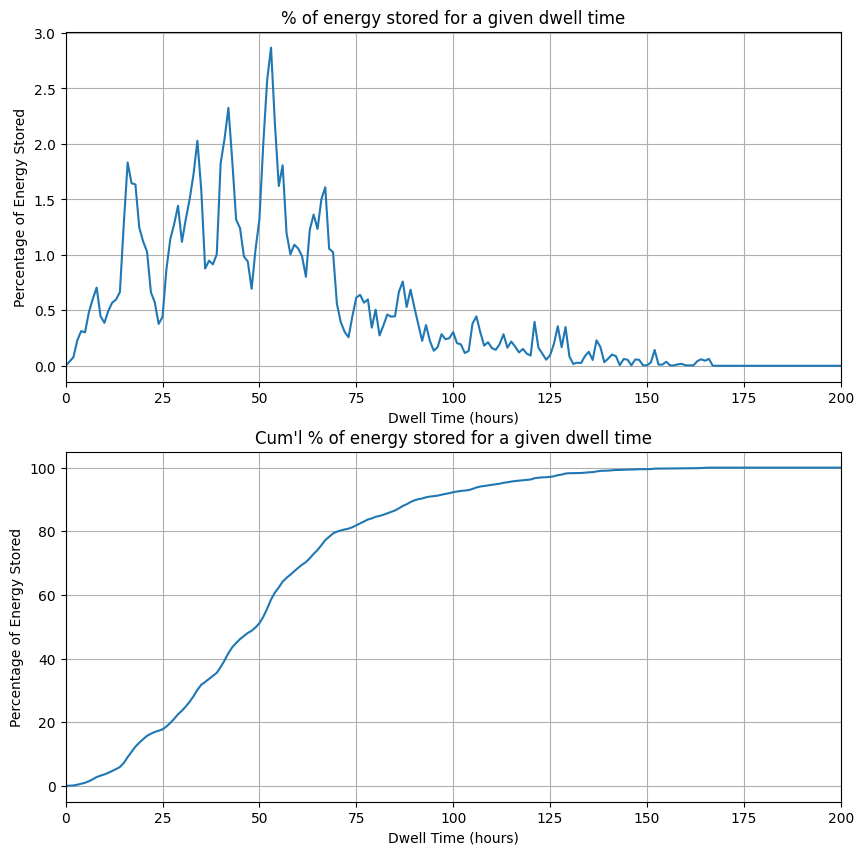

In [306]:
p_tegs = dwell_time/np.sum(dwell_time) * 100

fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(p_tegs)
ax[0].set_title("% of energy stored for a given dwell time")
ax[1].plot(np.cumsum(p_tegs))
ax[1].set_title("Cum'l % of energy stored for a given dwell time")
for a in ax:
    a.set_xlabel("Dwell Time (hours)")
    a.set_ylabel("Percentage of Energy Stored")
    a.set_xlim(0,200)
    a.grid(True)

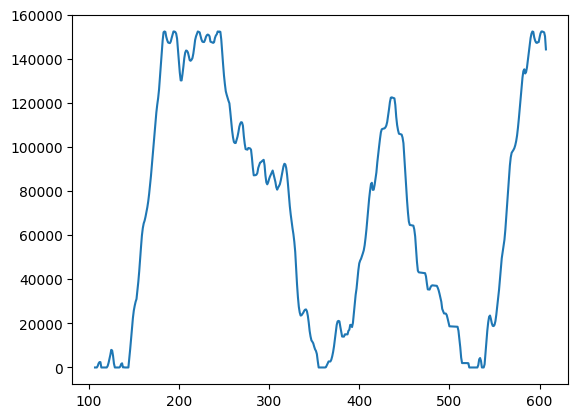

In [307]:
t_1 = first_zero
t_2 = t_1 + 500
plt.plot(np.arange(t_1, t_2+1), tegs_df.loc[t_1:t_2, "storage"], label="Storage")

In [308]:
# Li-ion
target_run = root_dir.joinpath('outputs','newEngland','emissions_and_baseline_v2','0.01')
# target_run = root_dir.joinpath('outputs','texas','emissions_and_baseline_v2','0.01')
# target_run = root_dir.joinpath('outputs','texas','temp_lossrate_sweep_stor2_v2','0.01_2400.0_3.0_stor2')
tech_header = "Liion_Moderate"
eff_up = 0.92
eff_down = 0.92
self_disch = 0

capacity = pd.read_csv(target_run.joinpath('capacity.csv'), index_col=0)
discharge = pd.read_csv(target_run.joinpath('power.csv'), index_col="Resource")
discharge.drop(index=["Zone", "AnnualSum"], inplace=True)
charge = pd.read_csv(target_run.joinpath('charge.csv'), index_col=0)
charge.drop(index=["Zone", "AnnualSum"], inplace=True)
storage = pd.read_csv(target_run.joinpath('storage.csv'), index_col=0)
storage.drop(index=["Zone"], inplace=True)

In [309]:
li_data = {
    "storage": storage.loc[:,tech_header],
    "charge": charge.loc[:,tech_header],
    "discharge": discharge.loc[:,tech_header]
}
li_df = pd.DataFrame(li_data)
# Make the index run from 1 -> 8760
li_df.set_index(np.arange(1,8761), inplace=True)
li_df.head()

# Find the first index where the storage is 0
first_zero = li_df[li_df["storage"] == 0].index[0] + 1
print(first_zero)

# To avoid the need to consider looping, we'll temporarily remake the TEGS data, starting from the first zero
li_charge =  np.concatenate((li_df["charge"].loc[first_zero:].values, li_df["charge"].loc[:first_zero].values))
li_discharge = np.concatenate((li_df["discharge"].loc[first_zero:].values, li_df["discharge"].loc[:first_zero].values))
li_storage = np.concatenate((li_df["storage"].loc[first_zero:].values, li_df["storage"].loc[:first_zero].values))

23


In [310]:
num_hours = 8760

stor_record_li = np.zeros([num_hours,2])
discharge_record_li = np.zeros([num_hours,num_hours])
dwell_time_li = np.zeros(num_hours)

tol = 1e-3

# Remember the df is indexed from 1 -> 8760
for t in range(8760):
    stored_energy = li_charge[t] * eff_up # Charge and discharge will never both be non-zero
    stor_record_li[t,0] = stored_energy # Amount charged in that hour
    stor_record_li[t,1] = stored_energy # Current tally of energy stored in hour t

    discharged_energy = li_discharge[t] / eff_down + li_storage[t-1] * self_disch
    counter = np.copy(discharged_energy)

    while counter > tol:
        t_0 = np.where(stor_record_li[:(t),1] > 0)[0][0] # Hour when the energy was stored
        used_energy = min(counter, stor_record_li[t_0,1]) # Amount of energy used in hour t from hour t_0
        stor_record_li[t_0,1] -= used_energy # Reduce the tally of the energy charged in hour t_0
        discharge_record_li[t_0,t] += used_energy # Amount of energy discharged in hour t from hour t_0
        dwell_time_li[(t - t_0)%num_hours] += used_energy # Tally the time spent in storage
        counter -= used_energy # Reduce the amount of energy left to discharge
        print(f'time: {t}, time_0: {t_0}, delta: {((t) - t_0)%num_hours}, used_energy: {used_energy:.1f}, discharged_energy: {discharged_energy:.1f}')


time: 8, time_0: 2, delta: 6, used_energy: 0.0, discharged_energy: 649.4
time: 9, time_0: 2, delta: 7, used_energy: 114.4, discharged_energy: 1000.9
time: 9, time_0: 3, delta: 6, used_energy: 721.8, discharged_energy: 1000.9
time: 9, time_0: 4, delta: 5, used_energy: 0.0, discharged_energy: 1000.9
time: 10, time_0: 4, delta: 6, used_energy: 0.0, discharged_energy: 1085.0
time: 11, time_0: 4, delta: 7, used_energy: 240.7, discharged_energy: 515.9
time: 11, time_0: 5, delta: 6, used_energy: 0.0, discharged_energy: 515.9
time: 32, time_0: 5, delta: 27, used_energy: 0.0, discharged_energy: 119.7
time: 33, time_0: 5, delta: 28, used_energy: 0.0, discharged_energy: 739.3
time: 34, time_0: 5, delta: 29, used_energy: 734.6, discharged_energy: 735.2
time: 34, time_0: 6, delta: 28, used_energy: 0.0, discharged_energy: 735.2
time: 35, time_0: 6, delta: 29, used_energy: 0.0, discharged_energy: 418.2
time: 36, time_0: 6, delta: 30, used_energy: 0.0, discharged_energy: 352.6
time: 42, time_0: 6, del

(array([391., 173., 170., 153., 168., 166., 157., 137., 151., 138., 146.,
        148., 135., 150., 127., 130., 126., 110., 102., 108.,  90.,  97.,
         76.,  90.,  99.,  85., 101.,  73.,  75.,  67.,  66.,  61.,  74.,
         63.,  70.,  64.,  64.,  58.,  63.,  54.,  47.,  36.,  43.,  46.,
         38.,  37.,  47.,  38.,  37.,  34.,  32.,  34.,  22.,  27.,  24.,
         22.,  20.,  21.,  19.,  21.,  16.,  18.,  16.,  21.,  15.,  12.,
         10.,  10.,  17.,   7.,   7.,   7.,  10.,   9.,   7.,   5.,   2.,
          7.,   5.,   9.,   3.,   7.,   4.,   4.,   4.,   3.,   3.,   3.,
          0.,   5.,   2.,   3.,   1.,   2.,   1.,   3.,   0.,   1.,   4.,
          3.]),
 array([3.55271368e-15, 2.29660745e+01, 4.59321489e+01, 6.88982234e+01,
        9.18642979e+01, 1.14830372e+02, 1.37796447e+02, 1.60762521e+02,
        1.83728596e+02, 2.06694670e+02, 2.29660745e+02, 2.52626819e+02,
        2.75592894e+02, 2.98558968e+02, 3.21525043e+02, 3.44491117e+02,
        3.67457192e+02, 3.9042

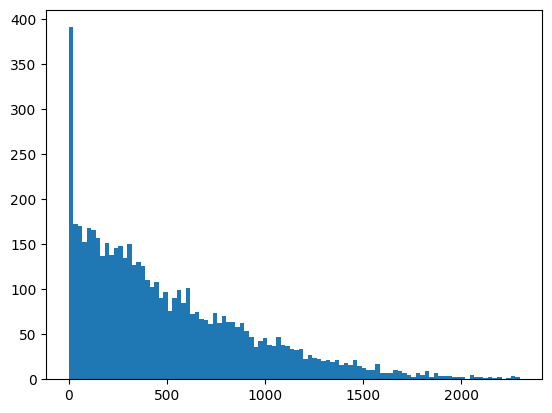

In [313]:
temp = discharge_record_li[discharge_record_li>0]
plt.hist(temp[:], bins=100)

(array([3.141e+03, 1.852e+03, 1.292e+03, 2.080e+02, 2.090e+02, 1.910e+02,
        1.940e+02, 1.870e+02, 1.890e+02, 1.550e+02, 1.470e+02, 1.310e+02,
        1.450e+02, 1.430e+02, 1.270e+02, 1.400e+02, 1.180e+02, 1.330e+02,
        1.200e+02, 1.410e+02, 1.290e+02, 1.030e+02, 1.160e+02, 8.300e+01,
        1.000e+02, 8.200e+01, 7.900e+01, 8.200e+01, 7.600e+01, 8.600e+01,
        6.100e+01, 7.000e+01, 5.800e+01, 5.400e+01, 7.700e+01, 5.700e+01,
        5.400e+01, 7.400e+01, 4.800e+01, 5.100e+01, 4.900e+01, 4.700e+01,
        5.000e+01, 5.200e+01, 4.400e+01, 4.400e+01, 3.400e+01, 4.600e+01,
        4.000e+01, 3.000e+01, 3.700e+01, 3.300e+01, 3.000e+01, 1.900e+01,
        3.000e+01, 2.800e+01, 2.500e+01, 2.300e+01, 2.200e+01, 1.700e+01,
        1.700e+01, 2.700e+01, 2.500e+01, 1.500e+01, 1.700e+01, 1.600e+01,
        1.000e+01, 1.600e+01, 1.200e+01, 1.200e+01, 1.100e+01, 1.500e+01,
        8.000e+00, 8.000e+00, 1.200e+01, 8.000e+00, 1.000e+01, 7.000e+00,
        8.000e+00, 1.400e+01, 9.000e+0

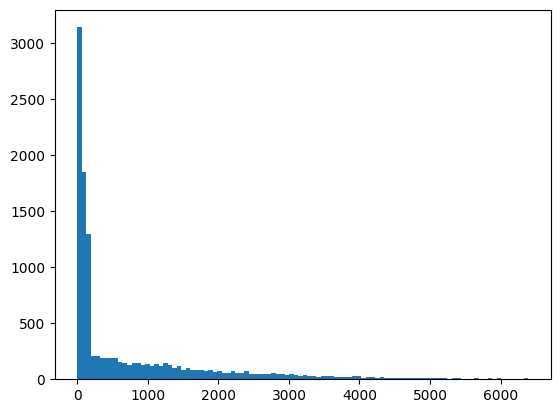

In [314]:
temp = discharge_record[discharge_record>0]
plt.hist(temp[:], bins=100)

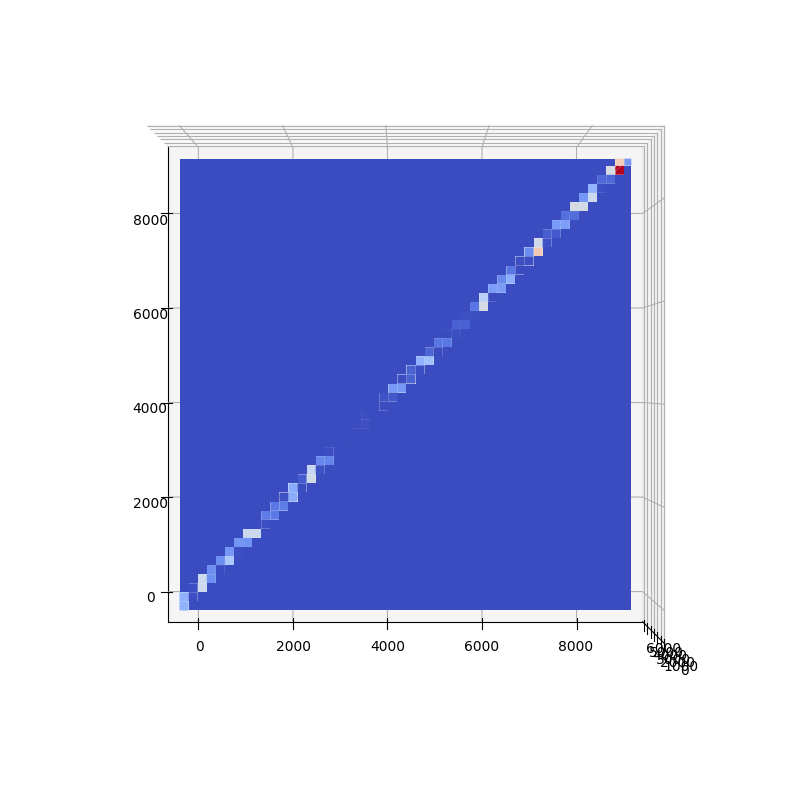

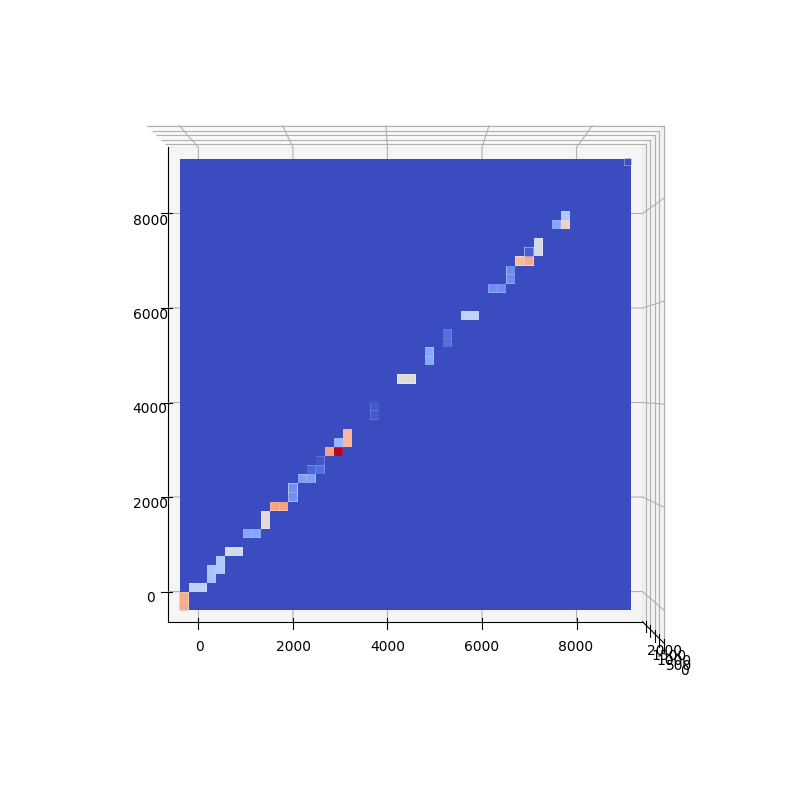

In [315]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
x = np.arange(8760)
y = np.arange(8760)
X, Y = np.meshgrid(x, y)
ax.plot_surface(X,Y,discharge_record, cmap=cm.coolwarm)
ax.view_init(-90, 0)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
ax.plot_surface(X,Y,discharge_record_li, cmap=cm.coolwarm)
ax.view_init(-90, 0)

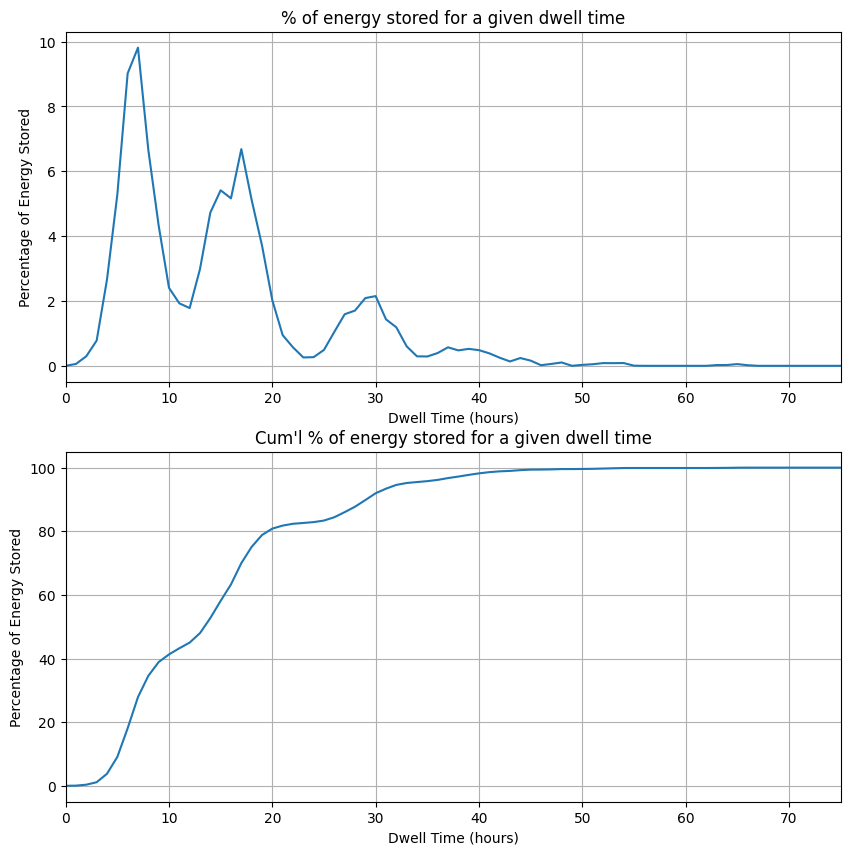

In [316]:
p_li = dwell_time_li / np.sum(dwell_time_li) * 100

fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(p_li)
ax[0].set_title("% of energy stored for a given dwell time")
ax[1].plot(np.cumsum(p_li))
ax[1].set_title("Cum'l % of energy stored for a given dwell time")
for a in ax:
    a.set_xlabel("Dwell Time (hours)")
    a.set_ylabel("Percentage of Energy Stored")
    a.set_xlim(0,75)
    a.grid(True)

Energy discharged according to TEGS dwell time calc: 9121982.65
Energy discharged according to TEGS discharge calc: 8527341.96 (excludes self-discharge)
Energy charged according to TEGS charge calc: 9121982.65
Energy discharged according to Li-ion dwell time calc: 2761618.93
Energy discharged according to Li-ion discharge calc: 2761618.93 (excludes self-discharge)
Energy charged according to Li-ion charge calc: 2761618.93
Mean dwell time for TEGS: 53.15 hours
Mean dwell time for Li-ion: 16.06 hours


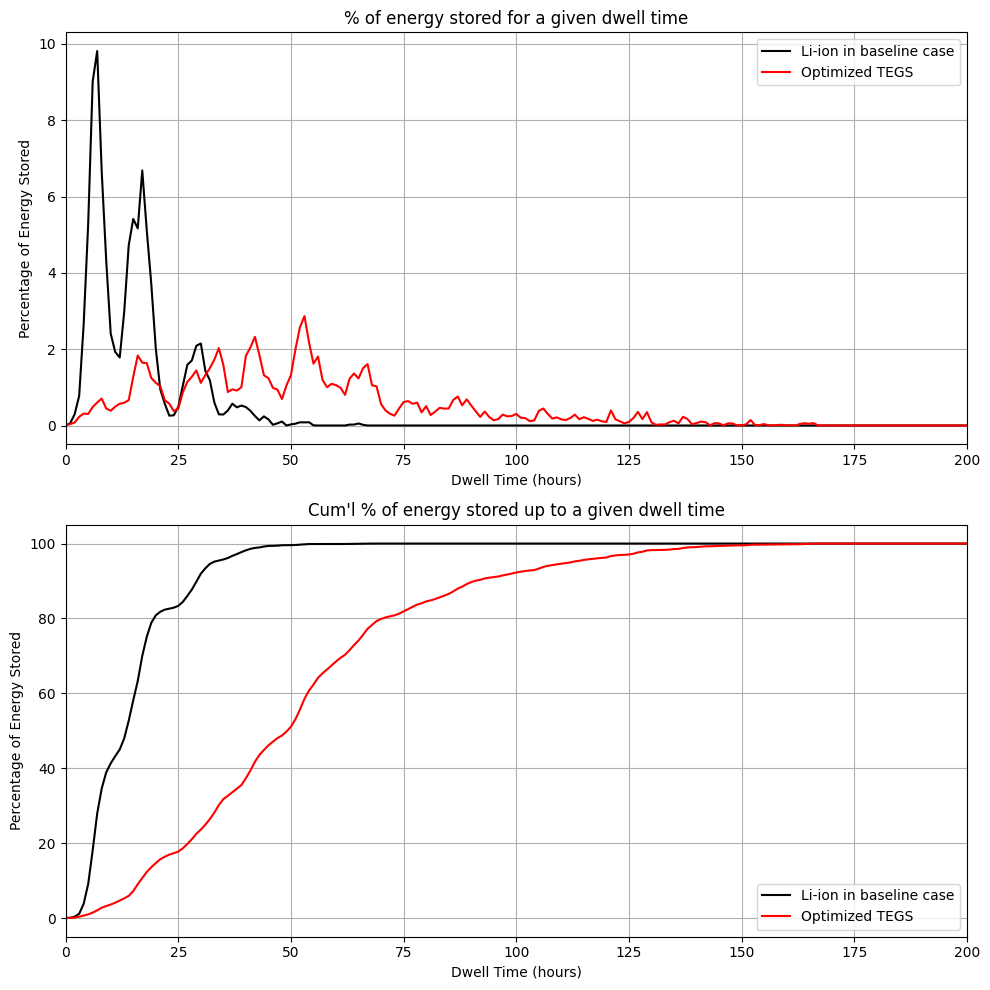

In [317]:
print(f'Energy discharged according to TEGS dwell time calc: {np.sum(dwell_time):.2f}')
print(f'Energy discharged according to TEGS discharge calc: {np.sum(tegs_discharge)/0.5:.2f} (excludes self-discharge)')
print(f'Energy charged according to TEGS charge calc: {np.sum(tegs_charge)*0.99:.2f}')

print(f'Energy discharged according to Li-ion dwell time calc: {np.sum(dwell_time_li):.2f}')
print(f'Energy discharged according to Li-ion discharge calc: {np.sum(li_discharge)/0.92:.2f} (excludes self-discharge)')
print(f'Energy charged according to Li-ion charge calc: {np.sum(li_charge)*0.92:.2f}')

t_range = np.arange(1,8761)
print(f'Mean dwell time for TEGS: {np.sum(p_tegs * t_range / 100):.2f} hours')
print(f'Mean dwell time for Li-ion: {np.sum(p_li * t_range / 100):.2f} hours')

fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(p_li, 'k-', label="Li-ion in baseline case")
ax[0].plot(p_tegs, 'r-', label="Optimized TEGS")
ax[0].set_title("% of energy stored for a given dwell time")
ax[1].plot(np.cumsum(p_li), 'k-', label="Li-ion in baseline case")
ax[1].plot(np.cumsum(p_tegs), 'r-', label="Optimized TEGS")
ax[1].set_title("Cum'l % of energy stored up to a given dwell time")
for a in ax:
    a.set_xlabel("Dwell Time (hours)")
    a.set_ylabel("Percentage of Energy Stored")
    a.legend()
    a.set_xlim(0,200)
    a.grid(True)

fig.tight_layout()

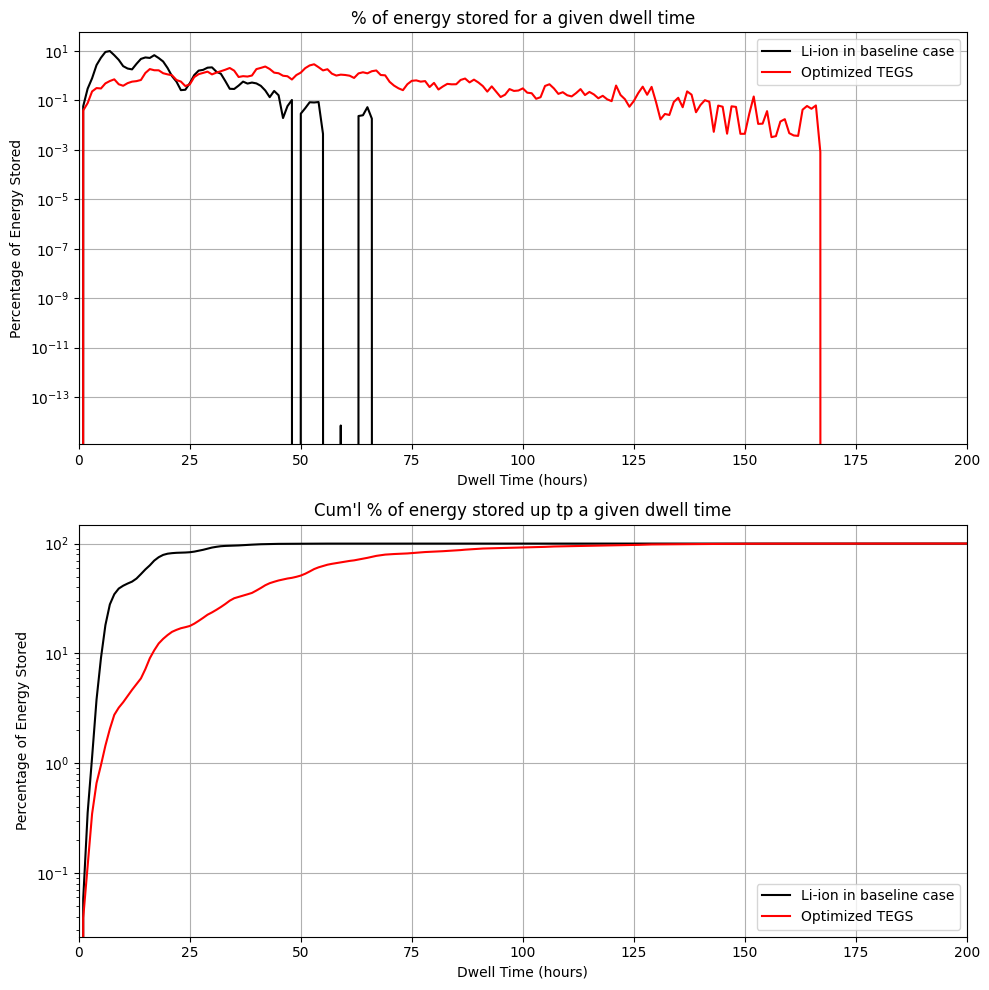

In [318]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(p_li, 'k-', label="Li-ion in baseline case")
ax[0].plot(p_tegs, 'r-', label="Optimized TEGS")
ax[0].set_title("% of energy stored for a given dwell time")
ax[1].plot(np.cumsum(p_li), 'k-', label="Li-ion in baseline case")
ax[1].plot(np.cumsum(p_tegs), 'r-', label="Optimized TEGS")
ax[1].set_title("Cum'l % of energy stored up tp a given dwell time")
for a in ax:
    a.set_xlabel("Dwell Time (hours)")
    a.set_ylabel("Percentage of Energy Stored")
    a.legend()
    a.set_xlim(0,200)
    a.grid(True)
    a.set_yscale('log')

fig.tight_layout()